In [3]:
import networkx as nx
%matplotlib inline

import matplotlib.pyplot as plt
import numpy
import numpy as np
import pylab

from IPython.display import HTML
from ipywidgets import interact

<IPython.core.display.Javascript object>


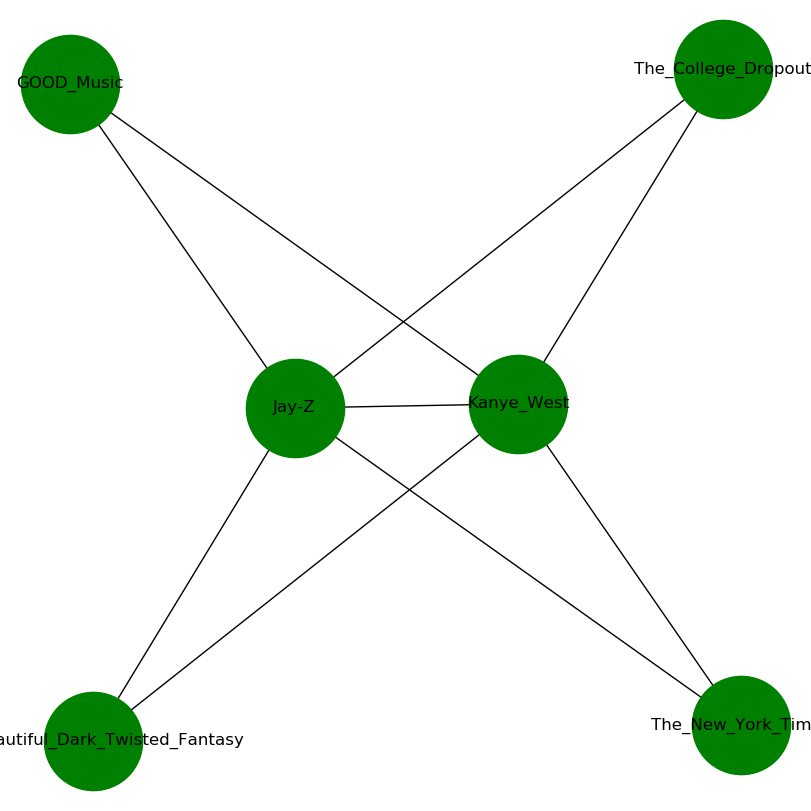




	Enter a Starting Wikipedia URL:


A Jupyter Widget

In [6]:
%matplotlib notebook
def refreshGraph():
    global pos
    plt.clf()
    pos = nx.spring_layout(G)
    nx.draw(G,pos,with_labels=True,node_size=5000,node_color ='g')
    plt.axis('off')
    plt.show()

def onClick(event):
    (x,y) = (event.xdata,event.ydata)
    closest = 'Kanye_West'
    closDist = pow(pow(x-pos[closest][0],2)+pow(y-pos[closest][1],2),.5)
    for i, name in enumerate(allNodes):            
        node = pos[name]
        distance = pow(pow(x-node[0],2)+pow(y-node[1],2),.5)
        if distance < closDist:
            closest = name
            closDist = distance
    if closDist < .3:
        buildNodes('toplinks0.txt',closest)
        refreshGraph()


# change to input as url and then run other script on that url
def buildNodes(fileName,node):
    file = open(fileName, "r")
    for line in file:
        line = line.split('/')
        allNodes.append(line[2].strip('\n'))
        G.add_node(line[2].strip('\n'))
        G.add_edge(node,line[2].strip('\n'))

def newWikiEntered(url):
    #run their code with url
    allNodes = ['Kanye_West']
    G.add_node('Kanye_West')
    refreshGraph()

fig, ax = plt.subplots()
fig.canvas.mpl_connect('button_press_event', onClick)

G = nx.Graph()

allNodes = ['Kanye_West']
G.add_node('Kanye_West')
pos = nx.spring_layout(G)

print('\n\n')
print('\tEnter a Starting Wikipedia URL:')
interact(newWikiEntered,url='')

refreshGraph()